In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### **Load the data & Preview the data**

In [2]:
data = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Random%20Forest/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### **Check for missing values**

In [3]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### **Check the data types**

In [4]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### **Summary statistics of numeric columns**

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### **Creating a new column to categorize the taxable_income into "Good" and "Risky"**

In [6]:
data['income_status'] = np.where(data['Taxable.Income']<=30000,'Risky','Good')
data.drop(['Taxable.Income'],axis=1,inplace=True)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income_status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


### **Distribution of taxable_income**

<Figure size 1600x900 with 0 Axes>

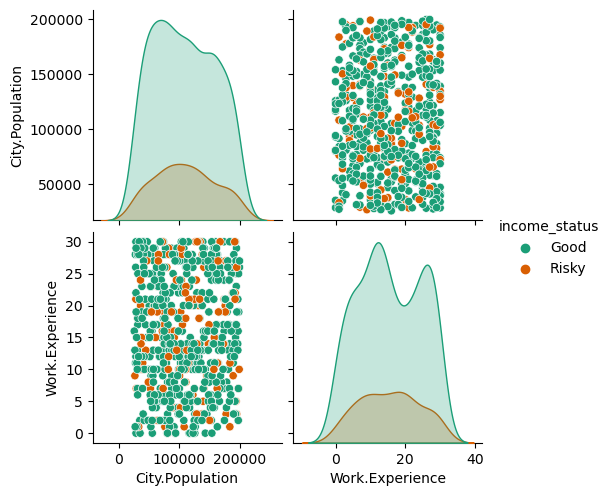

In [7]:
plt.figure(figsize=(16,9))
sns.pairplot(data,hue='income_status',palette='Dark2')
plt.show()

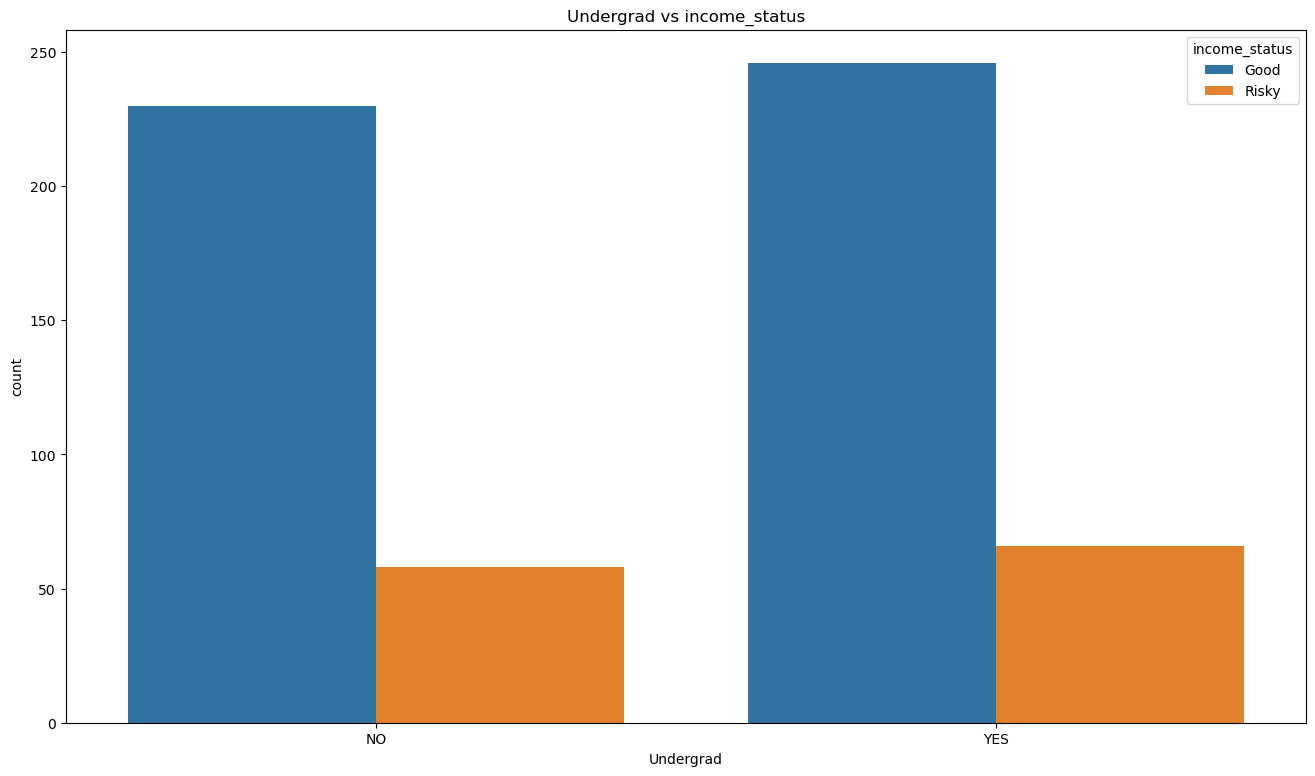

In [8]:
plt.figure(figsize=(16,9))
sns.countplot(x='Undergrad', hue='income_status', data=data)
plt.title('Undergrad vs income_status')
plt.show()

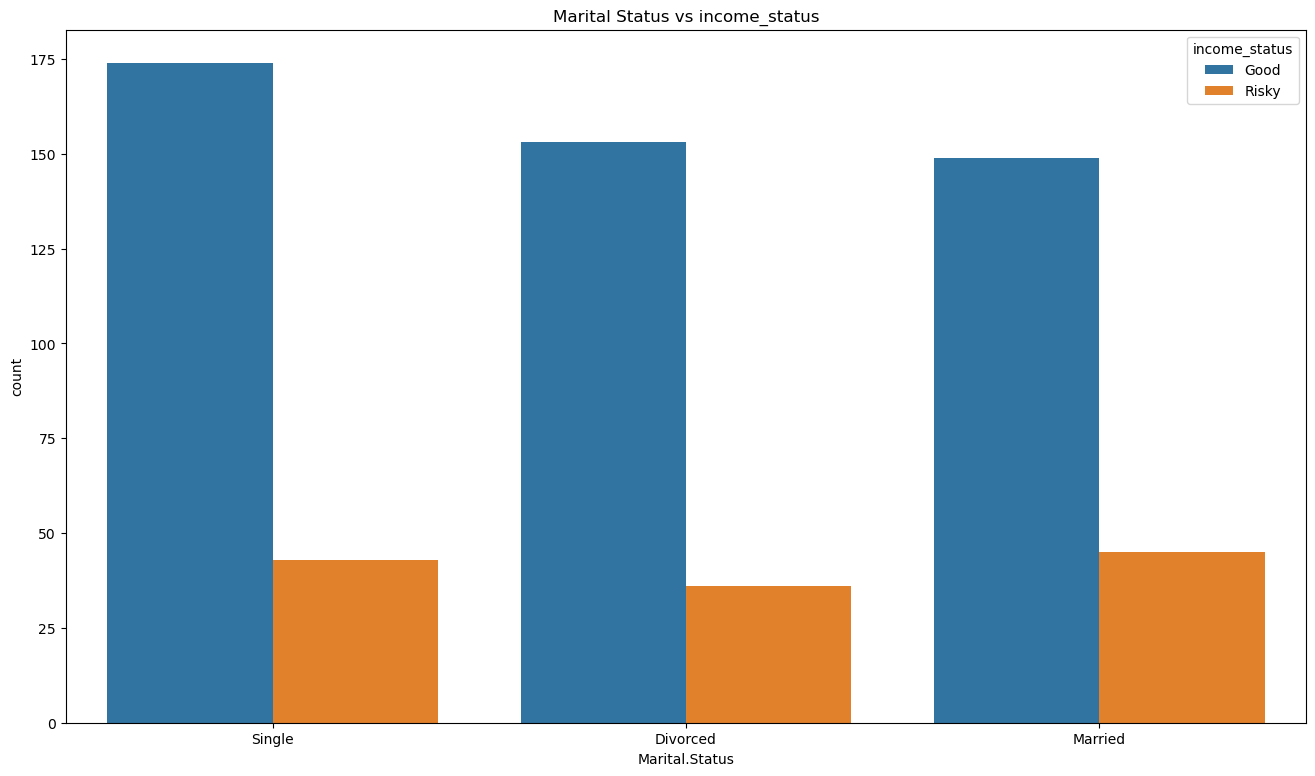

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x='Marital.Status', hue='income_status', data=data)
plt.title('Marital Status vs income_status')
plt.show()

### **Data preprocessing for the model**

In [10]:
X = data.drop(['income_status'], axis=1)
y = data['income_status']
X = pd.get_dummies(X, drop_first=True)

### **Splitting the data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### **Building the model**

In [12]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [13]:
y_pred = model.predict(X_test)

### **Calculate accuracy score**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7583333333333333


### **Create confusion matrix**

<AxesSubplot:>

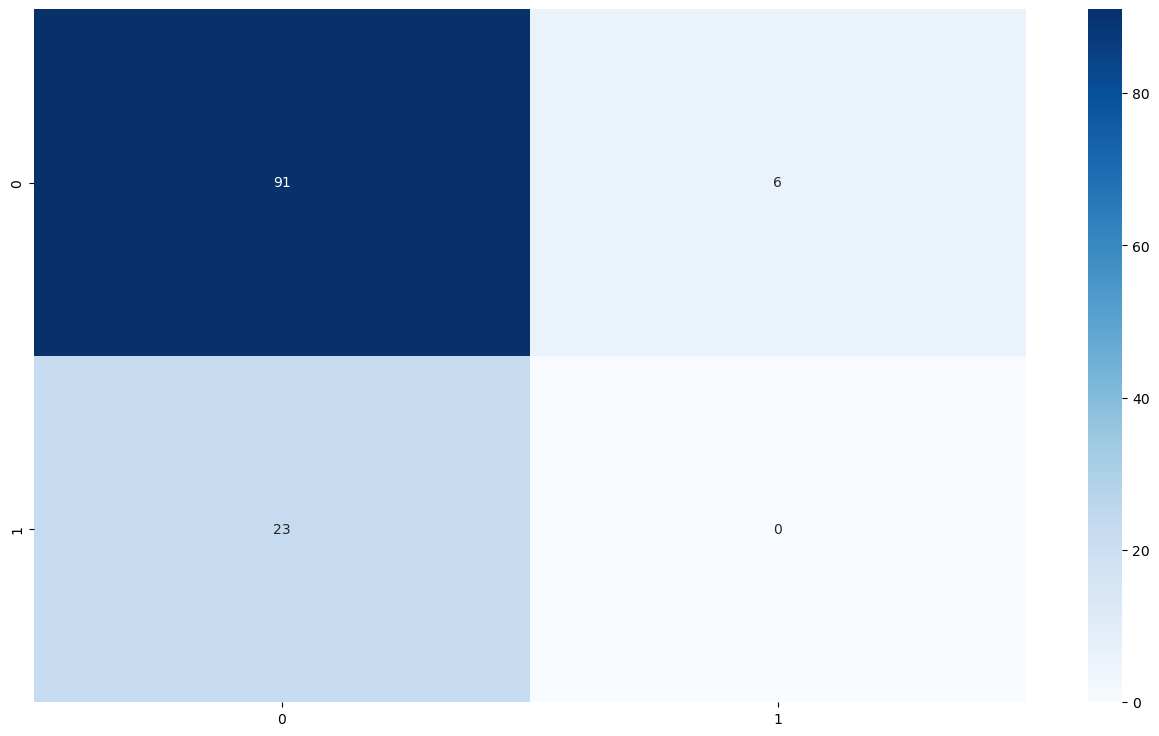

In [15]:
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")